<a href="https://colab.research.google.com/github/Mbigdeli2003/Deep-Learning/blob/main/DNN_Hw1_5Morteza_Bigdeli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW_1_5_Logestic Regression

## Importing libraries

In [1]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader, TensorDataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from keras.datasets import mnist
(images, labels), (test_X, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## Plotting images

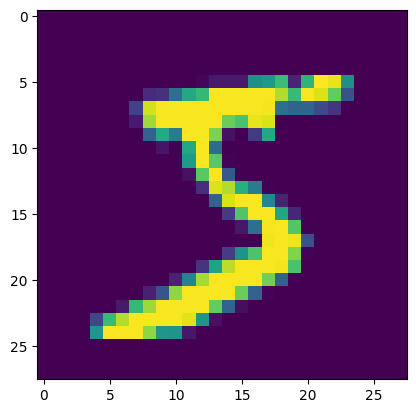

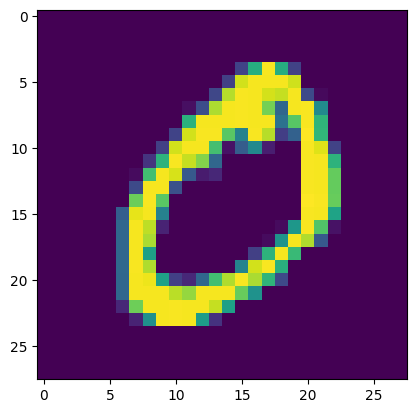

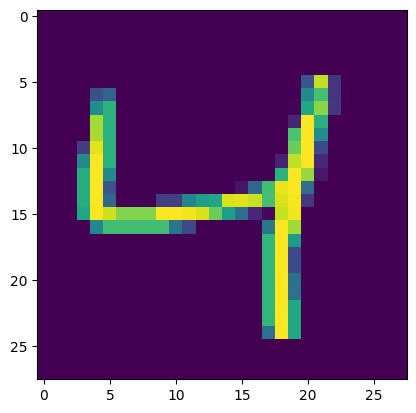

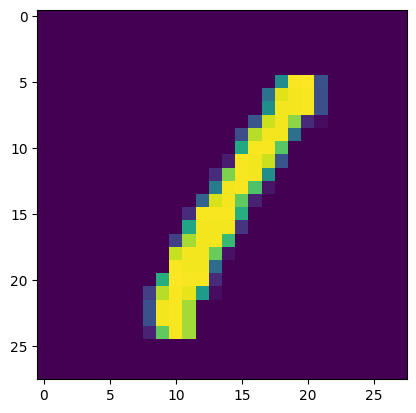

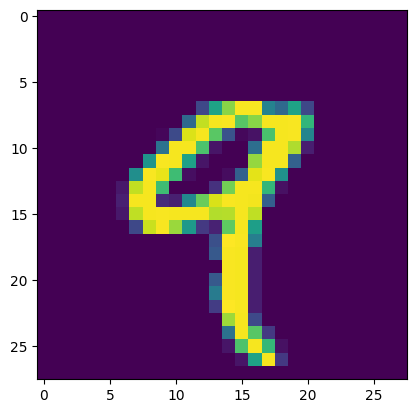

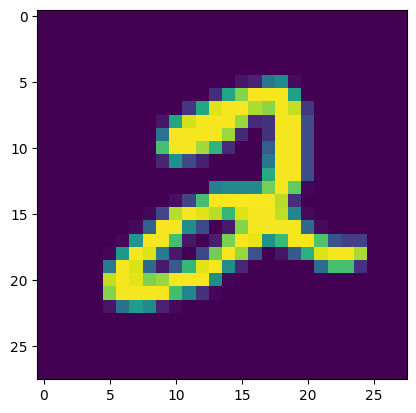

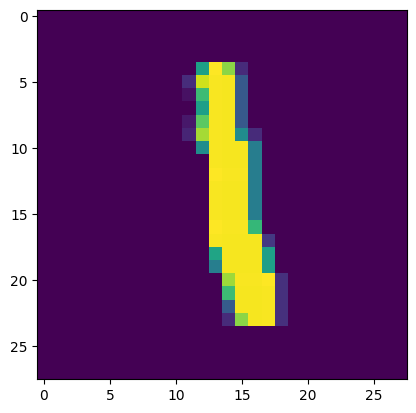

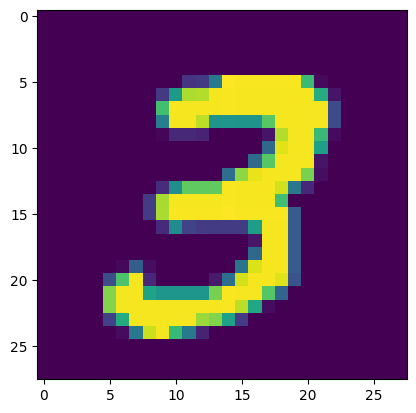

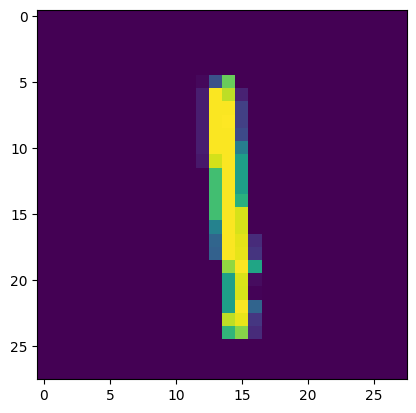

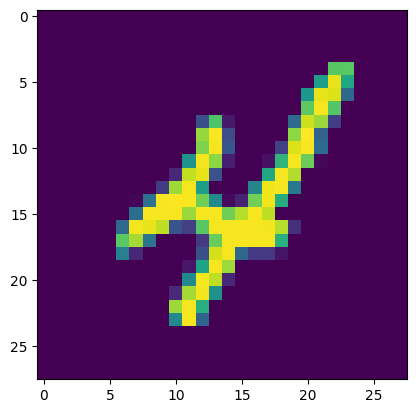

In [3]:
for i in range(10):
 plt.imshow(images[i])
 plt.show()

## Gray Plotting

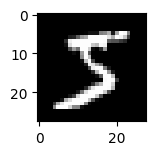

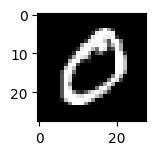

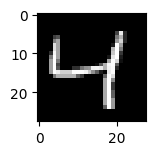

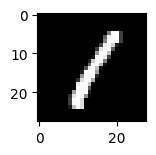

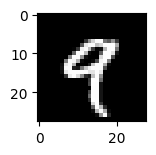

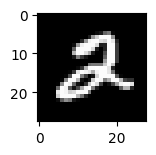

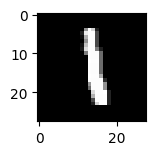

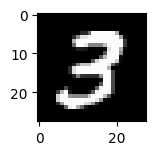

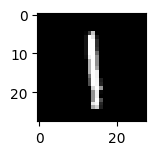

In [4]:
for i in range(9):
 plt.subplot(330 + 1 + i)
 plt.imshow(images[i], cmap=plt.get_cmap('gray'))
 plt.show()


##Training 28*28

Epoch [1/10], Step [100/938], Loss: 1.9587
Epoch [1/10], Step [200/938], Loss: 1.8448
Epoch [1/10], Step [300/938], Loss: 1.7918
Epoch [1/10], Step [400/938], Loss: 1.7704
Epoch [1/10], Step [500/938], Loss: 1.7448
Epoch [1/10], Step [600/938], Loss: 1.7481
Epoch [1/10], Step [700/938], Loss: 1.7476
Epoch [1/10], Step [800/938], Loss: 1.7170
Epoch [1/10], Step [900/938], Loss: 1.7287
Epoch [2/10], Step [100/938], Loss: 1.6710
Epoch [2/10], Step [200/938], Loss: 1.7213
Epoch [2/10], Step [300/938], Loss: 1.6719
Epoch [2/10], Step [400/938], Loss: 1.6421
Epoch [2/10], Step [500/938], Loss: 1.6736
Epoch [2/10], Step [600/938], Loss: 1.6605
Epoch [2/10], Step [700/938], Loss: 1.6369
Epoch [2/10], Step [800/938], Loss: 1.6185
Epoch [2/10], Step [900/938], Loss: 1.6394
Epoch [3/10], Step [100/938], Loss: 1.6524
Epoch [3/10], Step [200/938], Loss: 1.6717
Epoch [3/10], Step [300/938], Loss: 1.6451
Epoch [3/10], Step [400/938], Loss: 1.6471
Epoch [3/10], Step [500/938], Loss: 1.6439
Epoch [3/10

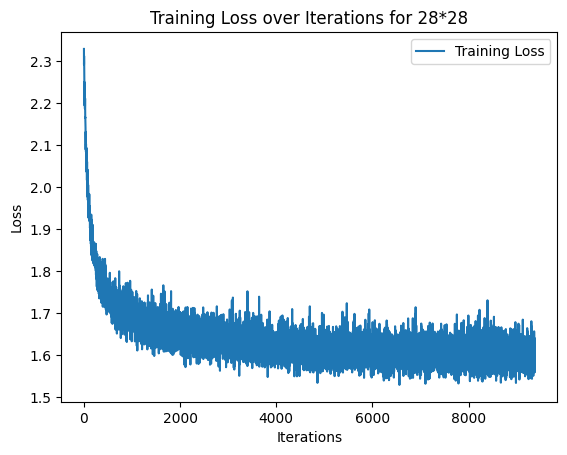

Test Error for 28*28: %10.250000000000004


In [5]:
(images, labels), (test_X, test_y) = mnist.load_data()
images = torch.from_numpy(images).to(torch.float32)
labels = torch.from_numpy(labels).to(torch.int64)
test_x = torch.from_numpy(test_X).to(torch.float32)
test_Y = torch.from_numpy(test_y).to(torch.int64)
mean = torch.mean(images)
std = torch.std(images)
images = (images-mean)/std
mean_1 = torch.mean(test_x)
std_1 = torch.std(test_x)
test_x = (test_x-mean_1)/std_1
###########train model###########
input_features = 28*28
output_features = 10
model = nn.Sequential(nn.Linear(in_features=input_features, out_features=output_features),
                      nn.Sigmoid())
loss_fn = nn.CrossEntropyLoss()
train_dataset = TensorDataset(images, labels)
test_dataset = TensorDataset(test_x, test_Y)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)
# Training the model
num_epochs = 10
total_step = len(train_loader)
learning_rate = 0.01

loss_values = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        loss = loss_fn(outputs, labels)

        model.zero_grad()
        loss.backward()
        with torch.no_grad():
            for param in model.parameters():
                param-=learning_rate*param.grad

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

        # Append loss for plotting
        loss_values.append(loss.item())


plt.plot(loss_values, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations for 28*28')
plt.legend()
plt.show()

# Evaluate the model on the test data
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for test_x, test_Y in test_loader:
        outputs = model(test_x.view(test_x.size(0), -1))
        _, predicted = torch.max(outputs.data, 1)
        total += test_Y.size(0)
        correct += (predicted == test_Y).sum().item()

test_error = (1 - correct / total)*100
print(f'Test Error for 28*28: %{test_error}')

## Training Downscale the resolution to 7 × 7 features by averaging the values of every 4 × 4 pixels.

Downscaled Data= torch.Size([60000, 7, 7])
Epoch [1/10], Step [100/938], Loss: 2.2793
Epoch [1/10], Step [200/938], Loss: 2.2602
Epoch [1/10], Step [300/938], Loss: 2.2312
Epoch [1/10], Step [400/938], Loss: 2.2102
Epoch [1/10], Step [500/938], Loss: 2.1966
Epoch [1/10], Step [600/938], Loss: 2.1687
Epoch [1/10], Step [700/938], Loss: 2.1483
Epoch [1/10], Step [800/938], Loss: 2.1328
Epoch [1/10], Step [900/938], Loss: 2.1161
Epoch [2/10], Step [100/938], Loss: 2.1123
Epoch [2/10], Step [200/938], Loss: 2.0605
Epoch [2/10], Step [300/938], Loss: 2.0562
Epoch [2/10], Step [400/938], Loss: 2.0664
Epoch [2/10], Step [500/938], Loss: 2.0583
Epoch [2/10], Step [600/938], Loss: 2.0344
Epoch [2/10], Step [700/938], Loss: 2.0282
Epoch [2/10], Step [800/938], Loss: 2.0406
Epoch [2/10], Step [900/938], Loss: 2.0312
Epoch [3/10], Step [100/938], Loss: 1.9744
Epoch [3/10], Step [200/938], Loss: 1.9792
Epoch [3/10], Step [300/938], Loss: 2.0025
Epoch [3/10], Step [400/938], Loss: 1.9993
Epoch [3/10

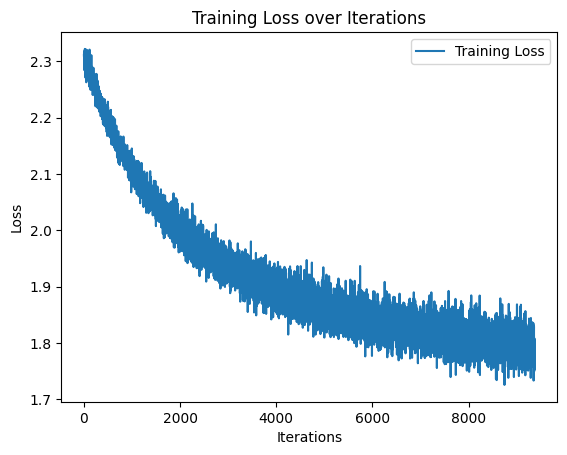

Test Error for 7*7: %10.250000000000004


In [6]:
##### Averaging 4*4 dwonscale to 7*7
from keras.datasets import mnist
(images, labels), (test_X, test_y) = mnist.load_data()
import torch.nn.functional as F
(images_1, labels_1), (test_X_1, test_y_1) = mnist.load_data()
###scaling
images_1 = torch.from_numpy(images_1).to(torch.float32)
labels_1 = torch.from_numpy(labels_1).to(torch.int64)
mean = torch.mean(images_1)
std = torch.std(images_1)
images_1 = (images_1-mean)/std
downscaled_data = F.avg_pool2d(images_1, kernel_size=4, stride=4)
images_2=downscaled_data
print('Downscaled Data=',downscaled_data.shape)

###Test Data
test_x_1 = torch.from_numpy(test_X).to(torch.float32)
test_Y_1 = torch.from_numpy(test_y).to(torch.int64)
mean_2 = torch.mean(test_x_1)
std_2 = torch.std(test_x_1)
test_x_1 = (test_x_1-mean_2)/std_2

downscaled_data_T = F.avg_pool2d(test_x_1, kernel_size=4, stride=4)
test_x_2=downscaled_data_T
test_dataset_1 = TensorDataset(test_x_2, test_Y_1)
test_loader_1 = DataLoader(test_dataset_1, batch_size=64, shuffle=True)

####Training
input_features = 7*7
output_features = 10
model = nn.Sequential(nn.Linear(in_features=input_features, out_features=output_features),
                      nn.Sigmoid())
loss_fn = nn.CrossEntropyLoss()
train_dataset_1 = TensorDataset(images_2, labels_1)
train_loader_1 = DataLoader(train_dataset_1, batch_size=64, shuffle=True)
# Training the model
num_epochs = 10
total_step = len(train_loader_1)
learning_rate = 0.01

loss_values = []
for epoch in range(num_epochs):
    for i, (images_2, labels_1) in enumerate(train_loader_1):
        images_2 = images_2.reshape(-1, 7*7)
        outputs_1= model(images_2)
        loss = loss_fn(outputs_1, labels_1)

        model.zero_grad()
        loss.backward()
        with torch.no_grad():
            for param in model.parameters():
                param-=learning_rate*param.grad

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

        # Append loss for plotting
        loss_values.append(loss.item())


plt.plot(loss_values, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations')
plt.legend()
plt.show()
# Evaluate the model on the test data
model.eval()
correct_1 = 0
total_1 = 0
with torch.no_grad():
    for test_x_2 , test_Y_1 in test_loader_1:
        outputs = model(test_x_2.view(test_x_2.size(0), -1))
        _, predicted_1 = torch.max(outputs.data, 1)
        total_1 += test_Y_1.size(0)
        correct_1 += (predicted_1 == test_Y_1).sum().item()

test_error_1 = (1 - correct_1 / total_1)*100
print(f'Test Error for 7*7: %{test_error}')